In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
dataset = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Delete unnecessary columns and rename "v1" and "v2"

In [4]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
dataset.drop(columns_to_drop, inplace=True, axis=1)
dataset.columns = ["Category", "Message"]

In [5]:
dataset.columns

Index(['Category', 'Message'], dtype='object')

Check if there are missing values

In [6]:
dataset.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
#Check if there are duplicated samples in the data
dataset.duplicated().sum()

403

In [8]:
dataset = dataset.drop_duplicates(keep='first')
dataset.duplicated().sum()

0

In [9]:
number_of_spam = dataset[dataset['Category'] == 'spam'].shape[0]
number_of_ham = dataset[dataset['Category'] == 'ham'].shape[0]


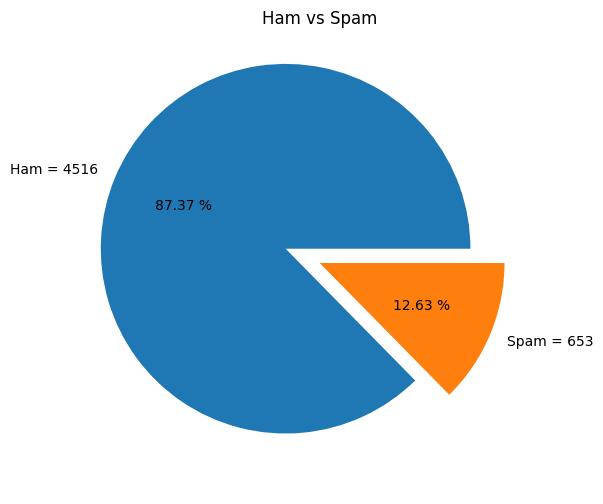

In [10]:
plt.figure(figsize=(15,6))
mail_categories = [number_of_ham, number_of_spam]
labels = [f"Ham = {number_of_ham}", f"Spam = {number_of_spam}"]
explode = [.2,0]
plt.pie(mail_categories, labels=labels, explode=explode, autopct="%.2f %%")
plt.title("Ham vs Spam")
plt.show()

In [11]:
encoder = LabelEncoder()
dataset['spam'] = encoder.fit_transform(dataset['Category'])
dataset.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
x = dataset['Message']
y = dataset['spam']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

Create a bag-of-words representation using CountVectorizer for the training data x_train

In [13]:
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)

In [14]:
classifier = MultinomialNB()
classifier.fit(x_train_counts, y_train)

MultinomialNB()

Now, let's create a bag-of-words representation using CountVectorizer, this time for the test data x_test

In [15]:
x_test_counts = vectorizer.transform(x_test)

In [16]:
y_pred = classifier.predict(x_test_counts)

In [17]:
#Display the confusion matrix
confusion_matrix = confusion_matrix(y_test,y_pred)

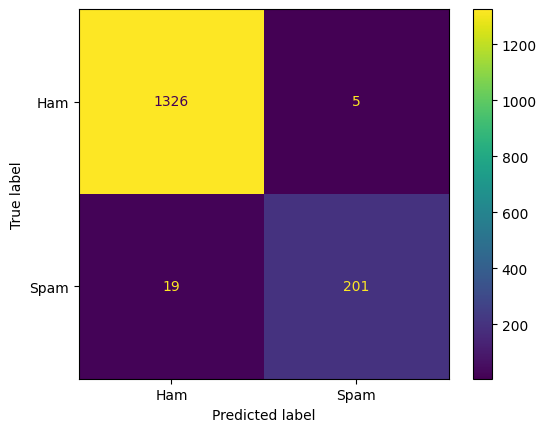

In [18]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=["Ham","Spam"])
cm_display.plot()
plt.show()

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1331
           1       0.98      0.91      0.94       220

    accuracy                           0.98      1551
   macro avg       0.98      0.95      0.97      1551
weighted avg       0.98      0.98      0.98      1551



In [20]:
emails = [
    "Hey jessica, I'm at the Ms.Salahshor class waiting for you, where are you?",
    
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    
    '''Join us on Saturday, February 24 at 14:00 UTC on our YouTube channel to take this
    interactive lesson, taught by Tutor Darryl.'''
]

emails_count = vectorizer.transform(emails)
print(emails_count)
classifier.predict(emails_count)

  (0, 920)	1
  (0, 983)	1
  (0, 1647)	1
  (0, 2672)	1
  (0, 3111)	1
  (0, 4195)	1
  (0, 6202)	1
  (0, 6685)	1
  (0, 6814)	1
  (0, 7026)	2
  (1, 291)	1
  (1, 2125)	1
  (1, 2187)	1
  (1, 2672)	1
  (1, 3529)	1
  (1, 4100)	1
  (1, 4460)	1
  (1, 4496)	1
  (1, 5258)	1
  (1, 6237)	1
  (1, 6548)	1
  (1, 7026)	1
  (2, 0)	1
  (2, 251)	1
  (2, 309)	1
  (2, 983)	1
  (2, 1421)	1
  (2, 1557)	1
  (2, 2547)	1
  (2, 3494)	1
  (2, 3710)	1
  (2, 4496)	2
  (2, 4564)	1
  (2, 5392)	1
  (2, 6080)	1
  (2, 6110)	1
  (2, 6237)	1
  (2, 6311)	1
  (2, 6562)	1


array([0, 1, 1])